# 1. PREPROCESSING

## 1.1 Imports libraries

In [118]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
import os
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer #process null values
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import lightgbm as lgb

from sklearn.decomposition import PCA

from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers


# system
import itertools
# matplotlib and seaborn for plotting
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

## 1.2 Load datasets

In [2]:
path = r'C:\Users\vient\Data\predict_salary\data_all'
question_data = pd.read_csv(os.path.join(path, 'question.csv'))
train_data = pd.read_csv(os.path.join(path,'train.csv'))
test_data = pd.read_csv(os.path.join(path, 'test.csv'))

In [3]:
print(train_data.shape)
print(test_data.shape)

(33857, 128)
(11259, 127)


<AxesSubplot:xlabel='Salary'>

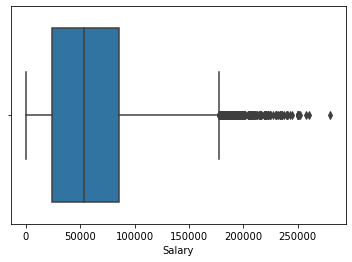

In [4]:
hav_sal = train_data[train_data['Salary'] > 0]
sns.boxplot(x=hav_sal['Salary'])

In [5]:
(hav_sal['Salary'] > 175000).sum()

495

In [6]:
def iqr_detect(data):
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)
    iqr = q3 - q1
    max_iqr = q3 + 1.5*iqr
    min_iqr = q1 - 1.5*iqr
    return min_iqr, max_iqr
min_sal, max_sal = iqr_detect(hav_sal['Salary'])

In [7]:
m = (hav_sal['Salary'] >= min_sal) & (hav_sal['Salary'] <= max_sal)
train_data = hav_sal[m]

array([[<AxesSubplot:title={'center':'Salary'}>]], dtype=object)

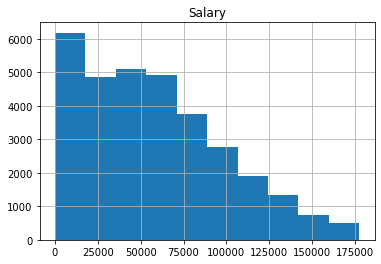

In [115]:
target.hist()

In [8]:
test_data

,No,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,33858,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",NaN,Back-end developer;Front-end developer;Full-st...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,33859,Yes,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,100 to 499 employees,Back-end developer;Database administrator;DevO...,...,Daily or almost every day,Male,Straight or heterosexual,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",White or of European descent,25 - 34 years old,Yes,No,The survey was an appropriate length,Very easy
2,33860,Yes,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...",20 to 99 employees,Front-end developer;Full-stack developer,...,I don't typically exercise,"Transgender;Non-binary, genderqueer, or gender...",Bisexual or Queer,"Other doctoral degree (Ph.D, Ed.D., etc.)",White or of European descent,18 - 24 years old,No,No,The survey was an appropriate length,Very easy
3,33861,Yes,Yes,India,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",NaN,Back-end developer,...,Daily or almost every day,Male,Straight or heterosexual,"Other doctoral degree (Ph.D, Ed.D., etc.)",South Asian,18 - 24 years old,No,NaN,The survey was an appropriate length,Somewhat easy
4,33862,Yes,No,Norway,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Fewer than 10 employees,Front-end developer;Full-stack developer;Mobil...,...,1 - 2 times per week,Male,Straight or heterosexual,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was too long,Somewhat easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11254,45112,Yes,No,Poland,"Yes, full-time",Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Back-end developer;Front-end developer;Mobile ...,...,1 - 2 times per week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11255,45113,Yes,Yes,United Kingdom,"Yes, full-time","Not employed, and not looking for work",Some college/university study without earning ...,"Computer science, computer engineering, or sof...",NaN,Back-end developer;Mobile developer;Student,...,I don't typically exercise,Male,Straight or heterosexual,NaN,NaN,18 - 24 years old,NaN,NaN,The survey was an appropriate length,NaN
11256,45114,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Mobile developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Hispanic or Latino/Latina,18 - 24 years old,No,No,The survey was an appropriate length,Very easy
11257,45115,Yes,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","10,000 or more employees",Back-end developer;Front-end developer;Full-st...,...,1 - 2 times per week,Female,Asexual,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",White or of European descent,25 - 34 years old,No,No,The survey was an appropriate length,Very easy


In [9]:
train_data_columns = [i for i in train_data.columns]
train_data_columns

['No',
 'Hobby',
 'OpenSource',
 'Country',
 'Student',
 'Employment',
 'FormalEducation',
 'UndergradMajor',
 'CompanySize',
 'DevType',
 'YearsCoding',
 'YearsCodingProf',
 'JobSatisfaction',
 'CareerSatisfaction',
 'HopeFiveYears',
 'JobSearchStatus',
 'LastNewJob',
 'AssessJob1',
 'AssessJob2',
 'AssessJob3',
 'AssessJob4',
 'AssessJob5',
 'AssessJob6',
 'AssessJob7',
 'AssessJob8',
 'AssessJob9',
 'AssessJob10',
 'AssessBenefits1',
 'AssessBenefits2',
 'AssessBenefits3',
 'AssessBenefits4',
 'AssessBenefits5',
 'AssessBenefits6',
 'AssessBenefits7',
 'AssessBenefits8',
 'AssessBenefits9',
 'AssessBenefits10',
 'AssessBenefits11',
 'JobContactPriorities1',
 'JobContactPriorities2',
 'JobContactPriorities3',
 'JobContactPriorities4',
 'JobContactPriorities5',
 'JobEmailPriorities1',
 'JobEmailPriorities2',
 'JobEmailPriorities3',
 'JobEmailPriorities4',
 'JobEmailPriorities5',
 'JobEmailPriorities6',
 'JobEmailPriorities7',
 'UpdateCV',
 'Currency',
 'SalaryType',
 'Salary',
 'Curre

In [10]:
#'Student','Employment', 'FormalEducation','UndergradMajor'
option_choices_cols_name= ['Hobby', 'OpenSource',
 'CompanySize', 'JobSatisfaction', 'CareerSatisfaction',
 'HopeFiveYears', 'JobSearchStatus', 'LastNewJob', 'UpdateCV', 'Currency', 'SalaryType',
 'TimeFullyProductive','AgreeDisagree1','AgreeDisagree2', 'AgreeDisagree3',
 'OperatingSystem','NumberMonitors', 'CheckInCode', 'AdBlocker','AdBlockerDisable','AdsAgreeDisagree1',
 'AdsAgreeDisagree2', 'AdsAgreeDisagree3', 'AIDangerous','AIInteresting',
 'AIResponsible', 'AIFuture','EthicsChoice', 'EthicsReport','EthicsResponsible','EthicalImplications',
 'StackOverflowRecommend','StackOverflowVisit','StackOverflowHasAccount', 'StackOverflowParticipate',
 'StackOverflowJobs','StackOverflowDevStory','StackOverflowJobsRecommend','StackOverflowConsiderMember', 'HypotheticalTools1',
 'HypotheticalTools2', 'HypotheticalTools3', 'HypotheticalTools4', 'HypotheticalTools5','WakeTime','HoursComputer',
 'HoursOutside', 'SkipMeals', 'Exercise', 'EducationParents','Age', 'Dependents',]

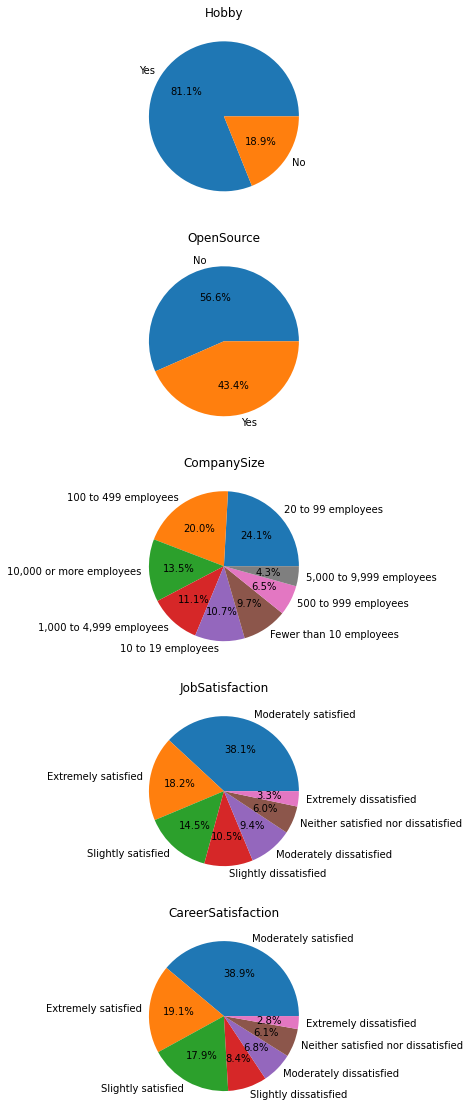

In [11]:
fig, axes = plt.subplots(round(len(option_choices_cols_name) / 10), 1,figsize=(20,20))
for i, ax in zip(['Hobby', 'OpenSource',
 'CompanySize', 'JobSatisfaction', 'CareerSatisfaction',
 'HopeFiveYears', 'JobSearchStatus', 'LastNewJob'], fig.axes):
    ax.pie(train_data[i].value_counts(), labels = train_data[i].value_counts().index, autopct='%1.1f%%')
    ax.set_title(i)


# Generate and mapping features by country

In [12]:
#Generate some features by country
Gen_map_country=train_data[train_data['Salary']>0]
Gen_map_country['avg_sal'] = Gen_map_country['Salary'].groupby(Gen_map_country['Country']).transform('mean')
Gen_map_country['min_sal'] = Gen_map_country['Salary'].groupby(Gen_map_country['Country']).transform('min')
Gen_map_country['max_sal'] = Gen_map_country['Salary'].groupby(Gen_map_country['Country']).transform('max')
Gen_map_country['count_sal'] = Gen_map_country['No'].groupby(Gen_map_country['Country']).transform('count')
Gen_map_country['mode_sal'] = Gen_map_country['Salary'].groupby(Gen_map_country['Country']).transform(lambda x:x.value_counts().index[0])
Gen_map_country['std_sal']=Gen_map_country.Country.map(Gen_map_country.groupby('Country')['Salary'].std())

In [13]:
Gen_map_country['count_sal'] = Gen_map_country['count_sal'].astype('float')

In [14]:
#Create map for country
Map_country=Gen_map_country[['Country','avg_sal','min_sal','max_sal','count_sal','mode_sal','std_sal']]
Salmap_country=Map_country.drop_duplicates()
#Salmap

In [15]:
Salmap_country

,Country,avg_sal,min_sal,max_sal,count_sal,mode_sal,std_sal
0,Nigeria,10302.447917,278.0,93336.0,96.0,13332.0,13919.663493
1,France,50508.022634,54.0,153000.0,972.0,48955.0,23862.234170
2,United Kingdom,65456.920016,14.0,173650.0,2488.0,62507.0,32432.854079
3,Russian Federation,24572.470320,12.0,122050.0,876.0,21228.0,16961.388834
5,Malaysia,21952.091954,1320.0,146868.0,87.0,9108.0,22320.279063
...,...,...,...,...,...,...,...
27528,Botswana,140000.000000,140000.0,140000.0,1.0,140000.0,NaN
27957,Democratic Republic of the Congo,36300.000000,12600.0,60000.0,2.0,12600.0,33516.861428
29266,Marshall Islands,44064.000000,44064.0,44064.0,1.0,44064.0,NaN
31285,Turkmenistan,12000.000000,12000.0,12000.0,1.0,12000.0,NaN


In [16]:
top_country = Salmap_country.sort_values(['count_sal', 'avg_sal'], ascending=False).head(10)
top_country = top_country.sort_values('avg_sal', ascending=False)
top_country

,Country,avg_sal,min_sal,max_sal,count_sal,mode_sal,std_sal
6,United States,95258.187282,1.0,177000.0,8618.0,100000.0,36292.094885
10,Australia,81250.360736,72.0,175941.0,815.0,95968.0,32137.279758
2,United Kingdom,65456.920016,14.0,173650.0,2488.0,62507.0,32432.854079
39,Canada,65037.217885,60.0,161043.0,1409.0,64417.0,27344.620836
9,Germany,59701.772978,12.0,176244.0,2361.0,73433.0,30605.196067
86,Netherlands,56872.595065,1224.0,176244.0,689.0,73433.0,28699.805602
1,France,50508.022634,54.0,153000.0,972.0,48955.0,23862.234170
3,Russian Federation,24572.470320,12.0,122050.0,876.0,21228.0,16961.388834
60,Brazil,23125.461055,36.0,120000.0,796.0,11232.0,18870.346115
11,India,16041.044356,8.0,140892.0,2773.0,3756.0,18987.640267


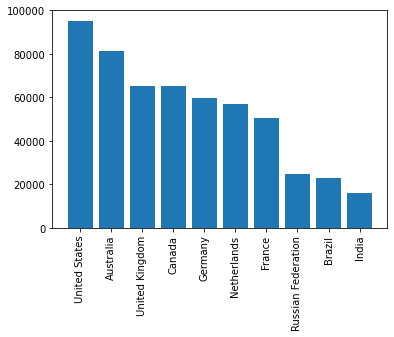

In [17]:
plt.bar(top_country['Country'], top_country['avg_sal'])
plt.xticks(np.arange(len(top_country['Country'])), top_country['Country'], rotation=90)
plt.show()

In [18]:
#Mapping new gen features to train, test base on Country
train_data=pd.merge(train_data,Salmap_country,on='Country',how='left')
test_data=pd.merge(test_data,Salmap_country,on='Country',how='left')

# Generate and mapping features by YearsCoding

In [19]:
#Generate some features by YearsCoding
Gen_map_YearsCoding=train_data[train_data['Salary']>0]
Gen_map_YearsCoding['YearsCoding_avg_sal'] = Gen_map_YearsCoding['Salary'].groupby(Gen_map_YearsCoding['YearsCoding']).transform('mean')
Gen_map_YearsCoding['YearsCoding_min_sal'] = Gen_map_YearsCoding['Salary'].groupby(Gen_map_YearsCoding['YearsCoding']).transform('min')
Gen_map_YearsCoding['YearsCoding_max_sal'] = Gen_map_YearsCoding['Salary'].groupby(Gen_map_YearsCoding['YearsCoding']).transform('max')
Gen_map_YearsCoding['YearsCoding_count_sal'] = Gen_map_YearsCoding['No'].groupby(Gen_map_YearsCoding['YearsCoding']).transform('count')
Gen_map_YearsCoding['YearsCoding_std_sal']=Gen_map_YearsCoding.YearsCoding.map(Gen_map_YearsCoding.groupby('YearsCoding')['Salary'].std())
#Gen_map_YearsCoding['mode_sal'] = Gen_map_YearsCoding['Salary'].groupby(Gen_map_YearsCoding['YearsCoding']).transform(lambda x:x.value_counts().index[0])

In [20]:
#Create map for year coding
Map_Yearscoding=Gen_map_YearsCoding[['YearsCoding','YearsCoding_avg_sal','YearsCoding_min_sal',
                                     'YearsCoding_max_sal','YearsCoding_count_sal','YearsCoding_std_sal']]
Salmap_Yearscoding=Map_Yearscoding.drop_duplicates()
#Salmap

In [21]:
Salmap_Yearscoding

,YearsCoding,YearsCoding_avg_sal,YearsCoding_min_sal,YearsCoding_max_sal,YearsCoding_count_sal,YearsCoding_std_sal
0,18-20 years,83544.256398,24.0,177258.0,2149.0,38626.518257
2,27-29 years,89685.879607,9348.0,175000.0,407.0,37549.113458
3,9-11 years,59235.810531,12.0,176244.0,4919.0,37379.743240
4,6-8 years,48783.443400,3.0,177000.0,7129.0,35544.995345
7,12-14 years,68528.361223,72.0,176000.0,3466.0,37175.586151
10,3-5 years,37298.640735,1.0,175000.0,6800.0,32224.987863
11,15-17 years,78097.204143,336.0,177516.0,2655.0,38969.465504
15,0-2 years,27377.737272,1.0,165000.0,2082.0,28440.069730
17,21-23 years,90159.640794,732.0,176000.0,1108.0,39073.997961
34,30 or more years,96636.675274,1680.0,177000.0,1278.0,38573.198351


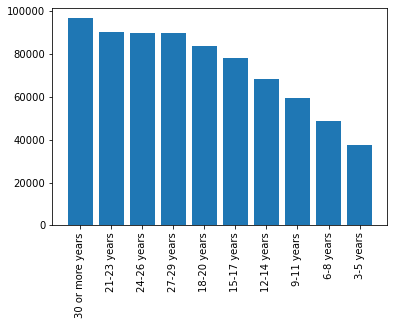

In [22]:
top_yearscoding = Salmap_Yearscoding.sort_values('YearsCoding_avg_sal', ascending=False).head(10)
plt.bar(top_yearscoding['YearsCoding'], top_yearscoding['YearsCoding_avg_sal'])
plt.xticks(np.arange(len(top_yearscoding['YearsCoding'])), top_yearscoding['YearsCoding'], rotation=90)
plt.show()

In [23]:
#Mapping new gen features to train, test base on Yearscoding
train_data=pd.merge(train_data,Salmap_Yearscoding,on='YearsCoding',how='left')
test_data=pd.merge(test_data,Salmap_Yearscoding,on='YearsCoding',how='left')

# Generate some features by RaceEthnicity

In [24]:
#Generate some features by RaceEthnicity
Gen_map_RaceEthnicity=train_data[train_data['Salary']>0]
Gen_map_RaceEthnicity['RaceEthnicity_avg_sal'] = Gen_map_RaceEthnicity['Salary'].groupby(Gen_map_RaceEthnicity['RaceEthnicity']).transform('mean')
Gen_map_RaceEthnicity['RaceEthnicity_min_sal'] = Gen_map_RaceEthnicity['Salary'].groupby(Gen_map_RaceEthnicity['RaceEthnicity']).transform('min')
Gen_map_RaceEthnicity['RaceEthnicity_max_sal'] = Gen_map_RaceEthnicity['Salary'].groupby(Gen_map_RaceEthnicity['RaceEthnicity']).transform('max')
Gen_map_RaceEthnicity['RaceEthnicity_count_sal'] = Gen_map_RaceEthnicity['No'].groupby(Gen_map_RaceEthnicity['RaceEthnicity']).transform('count')
Gen_map_RaceEthnicity['RaceEthnicity_std_sal']=Gen_map_RaceEthnicity.RaceEthnicity.map(Gen_map_RaceEthnicity.groupby('RaceEthnicity')['Salary'].std())
#Gen_map_YearsCoding['mode_sal'] = Gen_map_YearsCoding['Salary'].groupby(Gen_map_YearsCoding['YearsCoding']).transform(lambda x:x.value_counts().index[0])

In [25]:
#Create map for RaceEthnicity
Map_RaceEthnicity=Gen_map_RaceEthnicity[['RaceEthnicity','RaceEthnicity_avg_sal','RaceEthnicity_min_sal',
                                         'RaceEthnicity_max_sal','RaceEthnicity_count_sal','RaceEthnicity_std_sal']]
Salmap_RaceEthnicity=Map_RaceEthnicity.drop_duplicates()
#Salmap

In [26]:
Salmap_RaceEthnicity

,RaceEthnicity,RaceEthnicity_avg_sal,RaceEthnicity_min_sal,RaceEthnicity_max_sal,RaceEthnicity_count_sal,RaceEthnicity_std_sal
0,Black or of African descent,42025.293413,264.0,175000.0,501.0,40472.484726
1,White or of European descent,66644.024182,1.0,177516.0,20925.0,38463.597117
4,East Asian,51199.559724,40.0,175000.0,1013.0,42481.134683
9,NaN,NaN,NaN,NaN,NaN,NaN
24,South Asian,31590.987895,24.0,177000.0,2561.0,37283.146683
31,Hispanic or Latino/Latina,42626.996115,24.0,173630.0,1287.0,36280.763932
43,Middle Eastern;White or of European descent,64589.849515,1200.0,166000.0,206.0,42167.399063
57,Hispanic or Latino/Latina;White or of European...,56244.790456,72.0,176000.0,482.0,42737.977802
61,East Asian;White or of European descent,80987.738739,1650.0,175000.0,111.0,41745.482733
72,Black or of African descent;White or of Europe...,69015.653846,60.0,156250.0,52.0,37160.262636


In [27]:
#Mapping new gen features to train, test base on RaceEthnicity
train_data=pd.merge(train_data,Salmap_RaceEthnicity,on='RaceEthnicity',how='left')
test_data=pd.merge(test_data,Salmap_RaceEthnicity,on='RaceEthnicity',how='left')

# Generate some features by YearsCodingProf

In [28]:
#Generate some features by YearsCodingProf
Gen_map_YearsCodingProf=train_data[train_data['Salary']>0]
Gen_map_YearsCodingProf['YearsCodingProf_avg_sal'] = Gen_map_YearsCodingProf['Salary'].groupby(Gen_map_YearsCodingProf['YearsCodingProf']).transform('mean')
Gen_map_YearsCodingProf['YearsCodingProf_min_sal'] = Gen_map_YearsCodingProf['Salary'].groupby(Gen_map_YearsCodingProf['YearsCodingProf']).transform('min')
Gen_map_YearsCodingProf['YearsCodingProf_max_sal'] = Gen_map_YearsCodingProf['Salary'].groupby(Gen_map_YearsCodingProf['YearsCodingProf']).transform('max')
Gen_map_YearsCodingProf['YearsCodingProf_std_sal']=Gen_map_YearsCodingProf.YearsCodingProf.map(Gen_map_YearsCodingProf.groupby('YearsCodingProf')['Salary'].std())
#Gen_map_YearsCodingProf['YearsCoding_count_sal'] = Gen_map_YearsCodingProf['No'].groupby(Gen_map_YearsCodingProf['YearsCodingProf']).transform('count')
#Gen_map_YearsCoding['mode_sal'] = Gen_map_YearsCoding['Salary'].groupby(Gen_map_YearsCoding['YearsCoding']).transform(lambda x:x.value_counts().index[0])

In [29]:
#Create map for YearsCodingProf
Map_YearsCodingProf=Gen_map_YearsCodingProf[['YearsCodingProf','YearsCodingProf_avg_sal','YearsCodingProf_min_sal',
                                     'YearsCodingProf_max_sal','YearsCodingProf_std_sal']]
Salmap_YearsCodingProf=Map_YearsCodingProf.drop_duplicates()
#Salmap
#Mapping new gen features to train, test base on YearsCodingProf
train_data=pd.merge(train_data,Salmap_YearsCodingProf,on='YearsCodingProf',how='left')
test_data=pd.merge(test_data,Salmap_YearsCodingProf,on='YearsCodingProf',how='left')

# Generate some features by CurrencySymbol

In [30]:
#Generate some features by CurrencySymbol
Gen_map_CurrencySymbol=train_data[train_data['Salary']>0]
Gen_map_CurrencySymbol['CurrencySymbol_avg_sal'] = Gen_map_CurrencySymbol['Salary'].groupby(Gen_map_CurrencySymbol['CurrencySymbol']).transform('mean')
Gen_map_CurrencySymbol['CurrencySymbol_min_sal'] = Gen_map_CurrencySymbol['Salary'].groupby(Gen_map_CurrencySymbol['CurrencySymbol']).transform('min')
Gen_map_CurrencySymbol['CurrencySymbol_max_sal'] = Gen_map_CurrencySymbol['Salary'].groupby(Gen_map_CurrencySymbol['CurrencySymbol']).transform('max')
Gen_map_CurrencySymbol['CurrencySymbol_std_sal']=Gen_map_CurrencySymbol.CurrencySymbol.map(Gen_map_CurrencySymbol.groupby('CurrencySymbol')['Salary'].std())
#Gen_map_YearsCodingProf['YearsCoding_count_sal'] = Gen_map_YearsCodingProf['No'].groupby(Gen_map_YearsCodingProf['YearsCodingProf']).transform('count')
#Gen_map_YearsCoding['mode_sal'] = Gen_map_YearsCoding['Salary'].groupby(Gen_map_YearsCoding['YearsCoding']).transform(lambda x:x.value_counts().index[0])

In [31]:
#Create map for YearsCodingProf
Map_CurrencySymbol=Gen_map_CurrencySymbol[['CurrencySymbol','CurrencySymbol_avg_sal','CurrencySymbol_min_sal',
                                     'CurrencySymbol_max_sal','CurrencySymbol_std_sal']]
Salmap_CurrencySymbol=Map_CurrencySymbol.drop_duplicates()
#Salmap
#Mapping new gen features to train, test base on YearsCodingProf
train_data=pd.merge(train_data,Salmap_CurrencySymbol,on='CurrencySymbol',how='left')
test_data=pd.merge(test_data,Salmap_CurrencySymbol,on='CurrencySymbol',how='left')

In [32]:
Salmap_CurrencySymbol

,CurrencySymbol,CurrencySymbol_avg_sal,CurrencySymbol_min_sal,CurrencySymbol_max_sal,CurrencySymbol_std_sal
0,USD,85358.457520,1.0,177000.0,42245.725110
1,EUR,51022.228221,12.0,176244.0,28453.473198
2,GBP,65521.261453,14.0,173650.0,32577.057182
3,RUB,23397.294261,12.0,122050.0,15729.794897
4,MYR,17903.731343,1512.0,72816.0,11985.334876
...,...,...,...,...,...
18332,BTN,4704.000000,4704.0,4704.0,NaN
18620,JMD,3480.000000,3480.0,3480.0,NaN
20311,FJD,11822.666667,5750.0,16752.0,5589.401518
23618,OMR,63582.000000,46752.0,80412.0,23801.214255


In [33]:
#final train_data
train_data

,No,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,RaceEthnicity_count_sal,RaceEthnicity_std_sal,YearsCodingProf_avg_sal,YearsCodingProf_min_sal,YearsCodingProf_max_sal,YearsCodingProf_std_sal,CurrencySymbol_avg_sal,CurrencySymbol_min_sal,CurrencySymbol_max_sal,CurrencySymbol_std_sal
0,1,Yes,No,Nigeria,No,"Independent contractor, freelancer, or self-em...","Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",NaN,Database administrator;Designer;Full-stack dev...,...,501.0,40472.484726,63494.289745,12.0,177258.0,37709.225651,85358.457520,1.0,177000.0,42245.725110
1,2,Yes,Yes,France,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Back-end developer,...,20925.0,38463.597117,93665.926606,24.0,177516.0,37690.907860,51022.228221,12.0,176244.0,28453.473198
2,3,Yes,Yes,United Kingdom,No,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",NaN,Designer;Full-stack developer,...,20925.0,38463.597117,88256.791994,336.0,177000.0,38841.207866,65521.261453,14.0,173650.0,32577.057182
3,4,Yes,No,Russian Federation,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Back-end developer;Desktop or enterprise appli...,...,20925.0,38463.597117,73800.979178,33.0,176244.0,38569.123678,23397.294261,12.0,122050.0,15729.794897
4,6,Yes,No,Malaysia,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,NaN,Front-end developer;Full-stack developer,...,1013.0,42481.134683,63494.289745,12.0,177258.0,37709.225651,17903.731343,1512.0,72816.0,11985.334876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32770,33853,Yes,No,Germany,"Yes, part-time",Employed part-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","A natural science (ex. biology, chemistry, phy...","1,000 to 4,999 employees",Educator or academic researcher;Student;System...,...,NaN,NaN,49192.979071,1.0,177000.0,34777.376859,51022.228221,12.0,176244.0,28453.473198
32771,33854,Yes,No,India,"Yes, full-time",Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...","1,000 to 4,999 employees",Back-end developer;DevOps specialist;Student;S...,...,2561.0,37283.146683,34046.569676,4.0,176000.0,30155.358056,15667.903619,8.0,140892.0,18515.992843
32772,33855,Yes,No,India,No,"Independent contractor, freelancer, or self-em...","Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",NaN,"Back-end developer;C-suite executive (CEO, CTO...",...,2561.0,37283.146683,81813.927282,110.0,177516.0,39191.321534,15667.903619,8.0,140892.0,18515.992843
32773,33856,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",Fewer than 10 employees,Front-end developer;Mobile developer,...,20925.0,38463.597117,49192.979071,1.0,177000.0,34777.376859,65521.261453,14.0,173650.0,32577.057182


# Generate some features by UndergradMajor

In [34]:
Gen_map_UndergradMajor=train_data[train_data['Salary']>0]
Gen_map_UndergradMajor['UndergradMajor_avg_sal'] = Gen_map_UndergradMajor['Salary'].groupby(Gen_map_UndergradMajor['UndergradMajor']).transform('mean')
Gen_map_UndergradMajor['UndergradMajor_min_sal'] = Gen_map_UndergradMajor['Salary'].groupby(Gen_map_UndergradMajor['UndergradMajor']).transform('min')
Gen_map_UndergradMajor['UndergradMajor_max_sal'] = Gen_map_UndergradMajor['Salary'].groupby(Gen_map_UndergradMajor['UndergradMajor']).transform('max')
Gen_map_UndergradMajor['UndergradMajor_std_sal']=Gen_map_UndergradMajor.CurrencySymbol.map(Gen_map_UndergradMajor.groupby('UndergradMajor')['Salary'].std())


Map_UndergradMajor = Gen_map_UndergradMajor[['UndergradMajor','UndergradMajor_avg_sal','UndergradMajor_min_sal',
                                     'UndergradMajor_max_sal','UndergradMajor_std_sal']]
Salmap_UndergradMajor=Map_UndergradMajor.drop_duplicates()
#Salmap
#Mapping new gen features to train, test base on YearsCodingProf
train_data=pd.merge(train_data,Salmap_UndergradMajor,on='UndergradMajor',how='left')
test_data=pd.merge(test_data,Salmap_UndergradMajor,on='UndergradMajor',how='left')

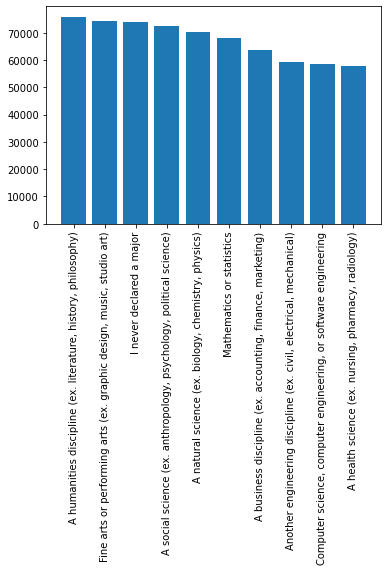

In [35]:
top_undergradmajor = Salmap_UndergradMajor.sort_values('UndergradMajor_avg_sal', ascending=False).head(10)
plt.bar(top_undergradmajor['UndergradMajor'], top_undergradmajor['UndergradMajor_avg_sal'])
plt.xticks(np.arange(len(top_undergradmajor['UndergradMajor'])),  top_undergradmajor['UndergradMajor'], rotation=90)
plt.show()

# Generate some features for all choice columns

In [36]:
for col in option_choices_cols_name:
    print('Start column: '+col)
    name='Gen_map_'+col
    avgname=col+'_avg_sal'
    minname=col+'_min_sal'
    maxname=col+'_max_sal'
    Mapname='Map_'+col
    Salmapname='Salmap_'+col
    name=train_data[train_data['Salary']>0]
    name[avgname] = name['Salary'].groupby(name[col]).transform('mean')
    name[minname] = name['Salary'].groupby(name[col]).transform('min')
    name[maxname] = name['Salary'].groupby(name[col]).transform('max')
    #Create map for YearsCodingProf
    Mapname=name[[col,avgname,minname,maxname]]
    Salmapname=Mapname.drop_duplicates()
    #Salmap
    #Mapping new gen features to train, test base on YearsCodingProf
    train_data=pd.merge(train_data,Salmapname,on=col,how='left')
    test_data=pd.merge(test_data,Salmapname,on=col,how='left')

Start column: Hobby
Start column: OpenSource
Start column: CompanySize
Start column: JobSatisfaction
Start column: CareerSatisfaction
Start column: HopeFiveYears
Start column: JobSearchStatus
Start column: LastNewJob
Start column: UpdateCV
Start column: Currency
Start column: SalaryType
Start column: TimeFullyProductive
Start column: AgreeDisagree1
Start column: AgreeDisagree2
Start column: AgreeDisagree3
Start column: OperatingSystem
Start column: NumberMonitors
Start column: CheckInCode
Start column: AdBlocker
Start column: AdBlockerDisable
Start column: AdsAgreeDisagree1
Start column: AdsAgreeDisagree2
Start column: AdsAgreeDisagree3
Start column: AIDangerous
Start column: AIInteresting
Start column: AIResponsible
Start column: AIFuture
Start column: EthicsChoice
Start column: EthicsReport
Start column: EthicsResponsible
Start column: EthicalImplications
Start column: StackOverflowRecommend
Start column: StackOverflowVisit
Start column: StackOverflowHasAccount
Start column: StackOve

In [37]:
print(test_data.shape)
print(train_data.shape)

(11259, 311)
(32775, 312)


In [38]:
train_data

,No,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise_max_sal,EducationParents_avg_sal,EducationParents_min_sal,EducationParents_max_sal,Age_avg_sal,Age_min_sal,Age_max_sal,Dependents_avg_sal,Dependents_min_sal,Dependents_max_sal
0,1,Yes,No,Nigeria,No,"Independent contractor, freelancer, or self-em...","Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",NaN,Database administrator;Designer;Full-stack dev...,...,177516.0,58646.848533,1.0,177516.0,82073.154214,24.0,177516.0,72430.744774,14.0,177258.0
1,2,Yes,Yes,France,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Back-end developer,...,177516.0,63225.441949,12.0,177258.0,82073.154214,24.0,177516.0,72430.744774,14.0,177258.0
2,3,Yes,Yes,United Kingdom,No,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",NaN,Designer;Full-stack developer,...,177516.0,56189.099623,8.0,177258.0,82073.154214,24.0,177516.0,53387.988603,1.0,177258.0
3,4,Yes,No,Russian Federation,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Back-end developer;Desktop or enterprise appli...,...,177516.0,43759.562834,1.0,171343.0,56661.357070,1.0,177000.0,72430.744774,14.0,177258.0
4,6,Yes,No,Malaysia,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,NaN,Front-end developer;Full-stack developer,...,177258.0,40110.806122,36.0,173650.0,56661.357070,1.0,177000.0,53387.988603,1.0,177258.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32770,33853,Yes,No,Germany,"Yes, part-time",Employed part-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","A natural science (ex. biology, chemistry, phy...","1,000 to 4,999 employees",Educator or academic researcher;Student;System...,...,177000.0,63225.441949,12.0,177258.0,56661.357070,1.0,177000.0,53387.988603,1.0,177258.0
32771,33854,Yes,No,India,"Yes, full-time",Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...","1,000 to 4,999 employees",Back-end developer;DevOps specialist;Student;S...,...,177516.0,63225.441949,12.0,177258.0,33014.528372,12.0,176000.0,53387.988603,1.0,177258.0
32772,33855,Yes,No,India,No,"Independent contractor, freelancer, or self-em...","Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",NaN,"Back-end developer;C-suite executive (CEO, CTO...",...,177516.0,67215.282362,38.0,176000.0,82073.154214,24.0,177516.0,53387.988603,1.0,177258.0
32773,33856,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",Fewer than 10 employees,Front-end developer;Mobile developer,...,177516.0,56189.099623,8.0,177258.0,56661.357070,1.0,177000.0,53387.988603,1.0,177258.0


### Target data

In [39]:
target = train_data['Salary'].astype(int)

### Missing values on training data

In [40]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [41]:
missing_values = missing_values_table(train_data)
missing_values.head()

Your selected dataframe has 312 columns.
There are 292 columns that have missing values.


,Missing Values,% of Total Values
UndergradMajor_std_sal,32775,100.0
TimeAfterBootcamp,29650,90.5
MilitaryUS,24492,74.7
HackathonReasons,20300,61.9
ErgonomicDevices,18025,55.0


In [42]:
missing_row_values = train_data.isnull().sum(axis=1)
missing_row_percentage = 100*missing_row_values/(train_data.shape[1]-1)

In [43]:
missing_row_df = pd.concat([missing_row_values,missing_row_percentage],axis=1)

In [44]:
missing_row_df_ren = missing_row_df.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

In [45]:
missing_row_df_ren[missing_row_df_ren.iloc[:,1]!=0].sort_values(
        '% of Total Values', ascending=False).round(1).head(10)

,Missing Values,% of Total Values
15205,245,78.8
29167,239,76.8
22836,239,76.8
20857,237,76.2
14782,237,76.2
13014,236,75.9
21599,235,75.6
22473,235,75.6
2099,235,75.6
31849,234,75.2


## View the data by datatypes

Convert some category columns to numeric

In [46]:
train_data["YearsCoding_convert"] = train_data["YearsCoding"].map( {'0-2 years': 1, '3-5 years': 4,'6-8 years': 7, 
                                                            '9-11 years': 10, '12-14 years': 13, '15-17 years': 16,
                                                           '18-20 years': 19, '21-23 years': 22, '24-26 years': 25,
                                                           '27-29 years': 28, '30 or more years': 30})
test_data["YearsCoding_convert"] = test_data["YearsCoding"].map( {'0-2 years': 1, '3-5 years': 4,'6-8 years': 7, 
                                                            '9-11 years': 10, '12-14 years': 13, '15-17 years': 16,
                                                           '18-20 years': 19, '21-23 years': 22, '24-26 years': 25,
                                                           '27-29 years': 28, '30 or more years': 30})

In [47]:
train_data["YearsCodingProf_convert"] = train_data["YearsCodingProf"].map( {'0-2 years': 1, '3-5 years': 4,'6-8 years': 7, 
                                                            '9-11 years': 10, '12-14 years': 13, '15-17 years': 16,
                                                           '18-20 years': 19, '21-23 years': 22, '24-26 years': 25,
                                                           '27-29 years': 28, '30 or more years': 30})
test_data["YearsCodingProf_convert"] = test_data["YearsCodingProf"].map( {'0-2 years': 1, '3-5 years': 4,'6-8 years': 7, 
                                                            '9-11 years': 10, '12-14 years': 13, '15-17 years': 16,
                                                           '18-20 years': 19, '21-23 years': 22, '24-26 years': 25,
                                                           '27-29 years': 28, '30 or more years': 30})

In [48]:
train_data["StackOverflowRecommend_convert"] = train_data["StackOverflowRecommend"].map( {'10 (Very Likely)': 10,
                                                                                  '0 (Not Likely)': 0})
test_data["StackOverflowRecommend_convert"] = test_data["StackOverflowRecommend"].map( {'10 (Very Likely)': 10,
                                                                                  '0 (Not Likely)': 0})

In [49]:
train_data["StackOverflowJobsRecommend_convert"] = train_data["StackOverflowJobsRecommend"].map( {'10 (Very Likely)': 10,
                                                                                  '0 (Not Likely)': 0})
test_data["StackOverflowJobsRecommend_convert"] = test_data["StackOverflowJobsRecommend"].map( {'10 (Very Likely)': 10,
                                                                                  '0 (Not Likely)': 0})

In [50]:
train_data["HoursComputer_convert"] = train_data["HoursComputer"].map( {'1 - 4 hours': 3,'5 - 8 hours': 7,
                                                               '9 - 12 hours': 11,'Over 12 hours': 14})
test_data["HoursComputer_convert"] = test_data["HoursComputer"].map( {'1 - 4 hours': 3,'5 - 8 hours': 7,
                                                               '9 - 12 hours': 11,'Over 12 hours': 14})

In [51]:
train_data["HoursOutside_convert"] = train_data["HoursOutside"].map( {'Less than 30 minutes': 0.3,'30 - 59 minutes': 0.8,
                                                               '1 - 2 hours': 1.5,'3 - 4 hours': 3.5, 'Over 4 hours': 5})
test_data["HoursOutside_convert"] = test_data["HoursOutside"].map( {'Less than 30 minutes': 0.3,'30 - 59 minutes': 0.8,
                                                               '1 - 2 hours': 1.5,'3 - 4 hours': 3.5, 'Over 4 hours': 5})

In [52]:
train_data["Age_convert"] = train_data["Age"].map( {'18 - 24 years old': 21,'25 - 34 years old': 30,
                                                               '35 - 44 years old': 40,'45 - 54 years old': 50})
test_data["Age_convert"] = test_data["Age"].map( {'18 - 24 years old': 21,'25 - 34 years old': 30,
                                                               '35 - 44 years old': 40,'45 - 54 years old': 50})

In [53]:
train_data["TimeFullyProductive_convert"] = train_data["TimeFullyProductive"].map( {'Less than a month': 1,'One to three months': 3,
                                                               'Six to nine months': 9,'Nine months to a year': 12,
                                                                           'More than a year': 15, 'Three to six months':6})
test_data["TimeFullyProductive_convert"] = test_data["TimeFullyProductive"].map( {'Less than a month': 1,'One to three months': 3,
                                                               'Six to nine months': 9,'Nine months to a year': 12,
                                                                           'More than a year': 15, 'Three to six months':6})

In [54]:
train_data["Hobby_convert"] = train_data["Hobby"].map( {'Yes': 1.0,'No': 0.0})
test_data["Hobby_convert"] = test_data["Hobby"].map( {'Yes': 1.0,'No': 0.0})

In [55]:
train_data["OpenSource_convert"] = train_data["OpenSource"].map( {'Yes': 1.0,'No': 0.0})
test_data["OpenSource_convert"] = test_data["OpenSource"].map( {'Yes': 1.0,'No': 0.0})

In [56]:
train_data["Student_convert"] = train_data["Student"].map( {'No': 2.0,'Yes, part-time': 1.0,'Yes, full-time': 0.0})
test_data["Student_convert"] = test_data["Student"].map( {'No': 2.0,'Yes, part-time': 1.0,'Yes, full-time': 0.0})

In [57]:
train_data["FormalEducation_convert"] = train_data["FormalEducation"].map( {'I never completed any formal education': 0.0,
            'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 1.0,
            'Primary/elementary school': 2.0,
            'Associate degree': 3.0,
            'Some college/university study without earning a degree': 4.0,
            'Bachelor’s degree (BA, BS, B.Eng., etc.)': 5.0,
            'Master’s degree (MA, MS, M.Eng., MBA, etc.)': 6.0,
            'Other doctoral degree (Ph.D, Ed.D., etc.)': 7.0,
            'Professional degree (JD, MD, etc.)': 8.0})
test_data["FormalEducation_convert"] = test_data["FormalEducation"].map( {'I never completed any formal education': 0.0,
            'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 1.0,
            'Primary/elementary school': 2.0,
            'Associate degree': 3.0,
            'Some college/university study without earning a degree': 4.0,
            'Bachelor’s degree (BA, BS, B.Eng., etc.)': 5.0,
            'Master’s degree (MA, MS, M.Eng., MBA, etc.)': 6.0,
            'Other doctoral degree (Ph.D, Ed.D., etc.)': 7.0,
            'Professional degree (JD, MD, etc.)': 8.0})

In [58]:
train_data["UndergradMajor_convert"] = train_data["UndergradMajor"].map({'Computer science, computer engineering, or software engineering': 2.0,
            'A natural science (ex. biology, chemistry, physics)': 1.0,
            'Web development or web design': 2.0,
            'Information systems, information technology, or system administration': 2.0,
            'A social science (ex. anthropology, psychology, political science)': 0.0,
            'A business discipline (ex. accounting, finance, marketing))': 0.0,
            'Another engineering discipline (ex. civil, electrical, mechanical)': 1.0,
            'A humanities discipline (ex. literature, history, philosophy)': 0.0,
            'Mathematics or statistics)': 2.0,
            'Fine arts or performing arts (ex. graphic design, music, studio art': 1.0,
            'I never declared a major': 0.0,
            'A health science (ex. nursing, pharmacy, radiology)': 0.0})
test_data["UndergradMajor_convert"] = test_data["UndergradMajor"].map({'Computer science, computer engineering, or software engineering': 2.0,
            'A natural science (ex. biology, chemistry, physics)': 1.0,
            'Web development or web design': 2.0,
            'Information systems, information technology, or system administration': 2.0,
            'A social science (ex. anthropology, psychology, political science)': 0.0,
            'A business discipline (ex. accounting, finance, marketing))': 0.0,
            'Another engineering discipline (ex. civil, electrical, mechanical)': 1.0,
            'A humanities discipline (ex. literature, history, philosophy)': 0.0,
            'Mathematics or statistics)': 2.0,
            'Fine arts or performing arts (ex. graphic design, music, studio art': 1.0,
            'I never declared a major': 0.0,
            'A health science (ex. nursing, pharmacy, radiology)': 0.0})

In [59]:
# Number of each type of column
train_data.dtypes.value_counts()

float64    238
object      86
int64        1
dtype: int64

In [60]:
# drop int column type
train_data = train_data.drop('No',axis=1)
test_data = test_data.drop('No',axis=1)

# Data preprocessing

## Clean data

Drop the columns and the rows have more 80% missing values

In [61]:
missing_cols_drop = missing_values[missing_values.iloc[:,1]>80].index

In [62]:
train_data = train_data.drop(missing_cols_drop,axis =1)
test_data = test_data.drop(missing_cols_drop,axis =1)

In [63]:
train_data

,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,...,StackOverflowJobsRecommend_convert,HoursComputer_convert,HoursOutside_convert,Age_convert,TimeFullyProductive_convert,Hobby_convert,OpenSource_convert,Student_convert,FormalEducation_convert,UndergradMajor_convert
0,Yes,No,Nigeria,No,"Independent contractor, freelancer, or self-em...","Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",NaN,Database administrator;Designer;Full-stack dev...,18-20 years,...,NaN,7.0,5.0,40.0,NaN,1.0,0.0,2.0,5.0,2.0
1,Yes,Yes,France,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Back-end developer,18-20 years,...,NaN,14.0,0.8,40.0,15.0,1.0,1.0,2.0,6.0,1.0
2,Yes,Yes,United Kingdom,No,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",NaN,Designer;Full-stack developer,27-29 years,...,NaN,7.0,1.5,40.0,3.0,1.0,1.0,2.0,4.0,2.0
3,Yes,No,Russian Federation,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Back-end developer;Desktop or enterprise appli...,9-11 years,...,10.0,7.0,0.8,30.0,3.0,1.0,0.0,2.0,5.0,2.0
4,Yes,No,Malaysia,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,NaN,Front-end developer;Full-stack developer,6-8 years,...,10.0,11.0,0.8,30.0,3.0,1.0,0.0,2.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32770,Yes,No,Germany,"Yes, part-time",Employed part-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","A natural science (ex. biology, chemistry, phy...","1,000 to 4,999 employees",Educator or academic researcher;Student;System...,3-5 years,...,NaN,7.0,0.8,30.0,3.0,1.0,0.0,1.0,6.0,1.0
32771,Yes,No,India,"Yes, full-time",Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...","1,000 to 4,999 employees",Back-end developer;DevOps specialist;Student;S...,6-8 years,...,NaN,7.0,0.8,21.0,1.0,1.0,0.0,0.0,5.0,1.0
32772,Yes,No,India,No,"Independent contractor, freelancer, or self-em...","Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",NaN,"Back-end developer;C-suite executive (CEO, CTO...",15-17 years,...,NaN,11.0,0.8,40.0,NaN,1.0,0.0,2.0,5.0,2.0
32773,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",Fewer than 10 employees,Front-end developer;Mobile developer,3-5 years,...,NaN,7.0,0.8,30.0,3.0,1.0,1.0,2.0,5.0,1.0


In [64]:
missing_rows_drop = train_data.isnull().sum(axis=1)

In [65]:
train_data = train_data[missing_rows_drop<(train_data.shape[1]/2)]

In [66]:
print('Training data shape:',train_data.shape)
print('Testing data shape:',test_data.shape)

Training data shape: (32035, 322)
Testing data shape: (11259, 321)


In [67]:
target = pd.DataFrame(train_data['Salary'])
train_data = train_data.drop('Salary',axis=1)

## Transform data by datatype

### Float columns

In [68]:
print(train_data.shape)
print(test_data.shape)

(32035, 321)
(11259, 321)


In [69]:
# get columns name
float_cols_name_train = train_data.select_dtypes('float').columns
float_cols_name_test = test_data.select_dtypes('float').columns

In [70]:
#fill na by median
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
train_arr = imputer.fit_transform(train_data.select_dtypes('float'))
test_arr = imputer.transform(test_data.select_dtypes('float'))

In [71]:
float_dataset_train = pd.DataFrame(train_arr,columns=float_cols_name_train)
float_dataset_test = pd.DataFrame(test_arr,columns=float_cols_name_test)

In [72]:
print('Training float dataset shape: ', float_dataset_train.shape)
print('Testing dloat dataset shape: ', float_dataset_test.shape)

Training float dataset shape:  (32035, 236)
Testing dloat dataset shape:  (11259, 236)


In [73]:
float_dataset_train.head()

,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,...,StackOverflowJobsRecommend_convert,HoursComputer_convert,HoursOutside_convert,Age_convert,TimeFullyProductive_convert,Hobby_convert,OpenSource_convert,Student_convert,FormalEducation_convert,UndergradMajor_convert
0,9.0,7.0,8.0,3.0,6.0,10.0,2.0,1.0,5.0,4.0,...,10.0,7.0,5.0,40.0,3.0,1.0,0.0,2.0,5.0,2.0
1,9.0,2.0,1.0,6.0,4.0,8.0,3.0,5.0,10.0,7.0,...,10.0,14.0,0.8,40.0,15.0,1.0,1.0,2.0,6.0,1.0
2,9.0,4.0,6.0,1.0,3.0,5.0,2.0,8.0,10.0,7.0,...,10.0,7.0,1.5,40.0,3.0,1.0,1.0,2.0,4.0,2.0
3,7.0,7.0,6.0,3.0,3.0,4.0,6.0,4.0,8.0,6.0,...,10.0,7.0,0.8,30.0,3.0,1.0,0.0,2.0,5.0,2.0
4,9.0,1.0,8.0,5.0,4.0,6.0,10.0,3.0,7.0,2.0,...,10.0,11.0,0.8,30.0,3.0,1.0,0.0,2.0,5.0,2.0


In [74]:
#Check corr
#Checkcorr= float_dataset_train
#Checkcorr['label']=target

In [75]:
# The undersample dataframe
#plt.figure(figsize = (20, 20))
#corr = float_dataset_train.corr()
#sns.heatmap(corr, cmap="coolwarm_r", annot=True)

In [76]:
#corr['label']

### Categorical multiple choice columns

In [77]:
#function for check which column contains multiple-choice
def check_multiple_choices(text):
    if type(text)==str:
        if ';' in text:
            return 1
        else:
            return 0
    return 0

In [78]:
#Categorical columns is columns, which are not in float cols
categorical_cols_name=[col for col in train_data.columns if col not in float_cols_name_train]
#Multiple choices is categorical with character: ";"
mul_choices_cols_name=[]
for i in categorical_cols_name:
    if sum(train_data[i].apply(check_multiple_choices))>0:
        mul_choices_cols_name.append(i)
option_choices_cols_name=[col for col in categorical_cols_name if col not in mul_choices_cols_name]

In [79]:
#list of columns have multiple-choice on train_dataset
#mul_choices_cols_name

In [80]:
#function for count the number of choices on each column
def count_multiple_choice(text):
    if type(text)==str:
        return text.split(";")
    else:
        return []

In [81]:
num_multiple_choice={}
for i in mul_choices_cols_name:
    flat_ls = list(train_data[i].apply(count_multiple_choice))
    num_multiple_choice[i]=len(set(list(itertools.chain(*flat_ls))))

In [82]:
num_multiple_choice

{'DevType': 20,
 'CommunicationTools': 11,
 'EducationTypes': 9,
 'SelfTaughtTypes': 9,
 'HackathonReasons': 7,
 'LanguageWorkedWith': 38,
 'LanguageDesireNextYear': 38,
 'DatabaseWorkedWith': 21,
 'DatabaseDesireNextYear': 21,
 'PlatformWorkedWith': 27,
 'PlatformDesireNextYear': 27,
 'FrameworkWorkedWith': 12,
 'FrameworkDesireNextYear': 12,
 'IDE': 22,
 'Methodology': 10,
 'VersionControl': 7,
 'AdBlockerReasons': 6,
 'AdsActions': 4,
 'ErgonomicDevices': 4,
 'Gender': 4,
 'SexualOrientation': 4,
 'RaceEthnicity': 7}

In [83]:
#display the number of choice on columns
#frame_num_choice = pd.DataFrame(num_multiple_choice.items(),columns=['Feature names','Number of choice']).sort_values('Number of choice',ascending=False)
#frame_num_choice

In [84]:
train_data[num_multiple_choice].head(5)

,DevType,CommunicationTools,EducationTypes,SelfTaughtTypes,HackathonReasons,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,...,FrameworkDesireNextYear,IDE,Methodology,VersionControl,AdBlockerReasons,AdsActions,ErgonomicDevices,Gender,SexualOrientation,RaceEthnicity
0,Database administrator;Designer;Full-stack dev...,Facebook;Office / productivity suite (Microsof...,Taken a part-time in-person course in programm...,The official documentation and/or standards fo...,NaN,PHP;SQL;HTML;CSS,C#;Java;PHP;Python;SQL;HTML;CSS,MySQL,Cassandra;MongoDB;SQL Server;MySQL;MariaDB,Linux;Windows Desktop or Server;WordPress,...,Angular;.NET Core;Node.js,NetBeans;Visual Studio,Formal standard such as ISO 9001 or IEEE 12207...,NaN,NaN,Saw an online advertisement and then researche...,NaN,Male,Straight or heterosexual,Black or of African descent
1,Back-end developer,Confluence;Google Hangouts/Chat;HipChat;Jira;S...,Taken an online course in programming or softw...,The official documentation and/or standards fo...,NaN,Go;Groovy;Java;JavaScript;Bash/Shell,Go;Java;Kotlin,MySQL;PostgreSQL,NaN,Linux,...,NaN,NetBeans,Agile;Extreme programming (XP);Formal standard...,Git;Mercurial,The ad-blocking software was causing display i...,Stopped going to a website because of their ad...,Ergonomic keyboard or mouse,Male,Straight or heterosexual,White or of European descent
2,Designer;Full-stack developer,"Office / productivity suite (Microsoft Office,...","Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,C++;JavaScript;SQL;HTML;CSS,Haskell,NaN,NaN,Linux,...,Node.js,Notepad++;Sublime Text,Agile;Scrum,Git;Copying and pasting files to network share...,NaN,Saw an online advertisement and then researche...,NaN,Male,Straight or heterosexual,White or of European descent
3,Back-end developer;Desktop or enterprise appli...,"Other chat system (IRC, proprietary software, ...",Taken an online course in programming or softw...,The official documentation and/or standards fo...,To improve my general technical skills or prog...,Assembly;C;C++;Go;Python;Bash/Shell,Assembly;C;C++,NaN,NaN,Linux,...,NaN,Vim,NaN,Git,The ad-blocking software was causing display i...,Stopped going to a website because of their ad...,NaN,Male,Straight or heterosexual,White or of European descent
4,Front-end developer;Full-stack developer,"Other chat system (IRC, proprietary software, ...","Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,C#;JavaScript;SQL;HTML;CSS,TypeScript,SQL Server,MongoDB;Google Cloud Storage,Windows Desktop or Server,...,Angular;Node.js,Notepad++;Visual Studio,Agile;Pair programming;Scrum,Subversion;Team Foundation Version Control,The website I was visiting asked me to disable...,Saw an online advertisement and then researche...,NaN,Male,Straight or heterosexual,East Asian


#### Encode multiple-choices to one-hot

In [85]:
#function for encoding multiple-choice to one hot
def encode(ls,ref):
    ini_vec = np.zeros((len(ref)))
    ini_ls=[]
    for i in ls:
        ini_ls.append(ref.index(i))
    ini_vec[ini_ls]=1
    return ini_vec.astype('int')

In [86]:
#apply the function to handle multiple-choices columns
ls_v4_train=[]
ls_v4_test=[]
ls_v2=[]
for c in mul_choices_cols_name:
    
    v1_train = train_data[c].apply(count_multiple_choice) #series
    v1_test = test_data[c].apply(count_multiple_choice) 
    
    v2 = list(set(list(itertools.chain(*v1_train)))) #list of unique of multiple-choices
    v3_train = v1_train.apply(encode,ref=v2) #numpy array
    v3_test = v1_test.apply(encode,ref=v2)
    
    v4_train = np.concatenate(v3_train.values).reshape(-1,len(v2))
    v4_test = np.concatenate(v3_test.values).reshape(-1,len(v2))
    ls_v4_train.append(v4_train)
    ls_v4_test.append(v4_test)
    ls_v2.append(v2)
v5_train = np.concatenate(ls_v4_train,axis=1)
v5_test = np.concatenate(ls_v4_test,axis=1)
v6 = list(itertools.chain(*ls_v2))
multi_choice_dataset_train = pd.DataFrame(v5_train,columns = v6)
multi_choice_dataset_test = pd.DataFrame(v5_test,columns = v6)

In [87]:
v4_train.shape

(32035, 7)

In [88]:
v5_train

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1]])

In [89]:
multi_choice_dataset_train.head()

,Educator or academic researcher,Designer,DevOps specialist,Full-stack developer,Mobile developer,Data or business analyst,Desktop or enterprise applications developer,Front-end developer,Engineering manager,Marketing or sales professional,...,Straight or heterosexual,Bisexual or Queer,Asexual,Middle Eastern,"Native American, Pacific Islander, or Indigenous Australian",Black or of African descent,South Asian,East Asian,Hispanic or Latino/Latina,White or of European descent
0,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [90]:
multi_choice_dataset_test.head()

,Educator or academic researcher,Designer,DevOps specialist,Full-stack developer,Mobile developer,Data or business analyst,Desktop or enterprise applications developer,Front-end developer,Engineering manager,Marketing or sales professional,...,Straight or heterosexual,Bisexual or Queer,Asexual,Middle Eastern,"Native American, Pacific Islander, or Indigenous Australian",Black or of African descent,South Asian,East Asian,Hispanic or Latino/Latina,White or of European descent
0,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,0,0,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [91]:
cols=pd.Series(multi_choice_dataset_train.columns)
for dup in cols[cols.duplicated()].unique(): 
    cols[cols[cols == dup].index.values.tolist()] = [dup + '_' + str(i) if i != 0 else dup for i in range(sum(cols == dup))]
multi_choice_dataset_train.columns=cols
multi_choice_dataset_test.columns=cols

In [92]:
multi_choice_dataset_train.columns.value_counts()

Visual Basic 6_1                                                                   1
iOS_1                                                                              1
Kotlin                                                                             1
Asexual                                                                            1
IBM Db2_1                                                                          1
                                                                                  ..
Ocaml                                                                              1
Saw an online advertisement and then researched it (without clicking on the ad)    1
Memcached                                                                          1
Redis_1                                                                            1
Mac OS_1                                                                           1
Length: 320, dtype: int64

In [93]:
multi_choice_dataset_train.iloc[:5,:20]

,Educator or academic researcher,Designer,DevOps specialist,Full-stack developer,Mobile developer,Data or business analyst,Desktop or enterprise applications developer,Front-end developer,Engineering manager,Marketing or sales professional,System administrator,"C-suite executive (CEO, CTO, etc.)",Product manager,Back-end developer,Database administrator,Embedded applications or devices developer,Game or graphics developer,Student,QA or test developer,Data scientist or machine learning specialist
0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [94]:
multi_choice_dataset_train_generate= multi_choice_dataset_train[cols]
multi_choice_dataset_train_generate['Salary']=target
multi_choice_dataset_train_generate.head()

,Educator or academic researcher,Designer,DevOps specialist,Full-stack developer,Mobile developer,Data or business analyst,Desktop or enterprise applications developer,Front-end developer,Engineering manager,Marketing or sales professional,...,Bisexual or Queer,Asexual,Middle Eastern,"Native American, Pacific Islander, or Indigenous Australian",Black or of African descent,South Asian,East Asian,Hispanic or Latino/Latina,White or of European descent,Salary
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,10800.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,73433.0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,66672.0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,31848.0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,21240.0


In [95]:
for col in multi_choice_dataset_train.columns:
    print('Start column: '+col)
    name='Gen_map_'+col
    avgname=col+'_avg_sal'
    minname=col+'_min_sal'
    maxname=col+'_max_sal'
    Mapname='Map_'+col
    Salmapname='Salmap_'+col
    name=multi_choice_dataset_train_generate[multi_choice_dataset_train_generate['Salary']>0]
    name[avgname] = name['Salary'].groupby(name[col]).transform('mean')
    name[minname] = name['Salary'].groupby(name[col]).transform('min')
    name[maxname] = name['Salary'].groupby(name[col]).transform('max')
    #Create map for YearsCodingProf
    Mapname=name[[col,avgname,minname,maxname]]
    Salmapname=Mapname.drop_duplicates()
    #print(Salmapname)
    #Mapping new gen features to train, test base on YearsCodingProf
    multi_choice_dataset_train=pd.merge(multi_choice_dataset_train,Salmapname,on=col,how='left')
    multi_choice_dataset_test=pd.merge(multi_choice_dataset_test,Salmapname,on=col,how='left')

Start column: Educator or academic researcher
Start column: Designer
Start column: DevOps specialist
Start column: Full-stack developer
Start column: Mobile developer
Start column: Data or business analyst
Start column: Desktop or enterprise applications developer
Start column: Front-end developer
Start column: Engineering manager
Start column: Marketing or sales professional
Start column: System administrator
Start column: C-suite executive (CEO, CTO, etc.)
Start column: Product manager
Start column: Back-end developer
Start column: Database administrator
Start column: Embedded applications or devices developer
Start column: Game or graphics developer
Start column: Student
Start column: QA or test developer
Start column: Data scientist or machine learning specialist
Start column: Facebook
Start column: Confluence
Start column: Stack Overflow Enterprise
Start column: HipChat
Start column: Other chat system (IRC, proprietary software, etc.)
Start column: Other wiki tool (Github, Google 

Start column: Coda
Start column: RubyMine
Start column: IPython / Jupyter
Start column: PyCharm
Start column: Android Studio
Start column: IntelliJ
Start column: Visual Studio
Start column: Kanban
Start column: Agile
Start column: Formal standard such as ISO 9001 or IEEE 12207 (aka “waterfall” methodologies)
Start column: Pair programming
Start column: Mob programming
Start column: Extreme programming (XP)
Start column: Evidence-based software engineering
Start column: Lean
Start column: PRINCE2
Start column: Scrum
Start column: I don't use version control
Start column: Subversion
Start column: Team Foundation Version Control
Start column: Zip file back-ups
Start column: Copying and pasting files to network shares
Start column: Git
Start column: Mercurial
Start column: The website I was visiting forced me to disable it to access their content
Start column: The ad-blocking software was causing display issues on a website
Start column: I wanted to support the website I was visiting by vi

In [96]:
#multi_choice_dataset_train= multi_choice_dataset_train.drop('Salary',axis=1)
print('Training multiple-choices dataset shape: ', multi_choice_dataset_train.shape)
print('Testing multiple-choices dataset shape: ', multi_choice_dataset_test.shape)

Training multiple-choices dataset shape:  (32035, 1280)
Testing multiple-choices dataset shape:  (11259, 1280)


### Categorical "option-choices" columns type

In [97]:
option_choices_cols_name=[col for col in categorical_cols_name if col not in mul_choices_cols_name]

In [98]:
#impute missing value by majority class
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
train_data_arr = imputer.fit_transform(train_data[option_choices_cols_name])
test_data_arr = imputer.transform(test_data[option_choices_cols_name])

In [99]:
option_choices_dataset_train = pd.DataFrame(train_data_arr,columns=option_choices_cols_name)
option_choices_dataset_test = pd.DataFrame(test_data_arr,columns=option_choices_cols_name)

#### Encode option-choices to one-hot columns

In [100]:
# Create a label encoder for option columns
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in option_choices_cols_name:
    # If 2 or fewer unique categories
    if len(list(option_choices_dataset_train[col].unique())) <= 2:
        # Train on the training data
        le.fit(option_choices_dataset_train[col])
        # Transform both training and testing data
        option_choices_dataset_train[col] = le.transform(option_choices_dataset_train[col])
        option_choices_dataset_test[col] = le.transform(option_choices_dataset_test[col])    
        # Keep track of how many columns were label encoded
        le_count += 1
            
print('%d columns were label encoded.' % le_count)

4 columns were label encoded.


In [101]:
for col in option_choices_cols_name:
    # If 2 or fewer unique categories
    if len(list(option_choices_dataset_train[col].unique())) <= 2:
        print(col)

Hobby
OpenSource
Dependents
MilitaryUS


In [102]:
option_choices_dataset_train.head(5)

,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,YearsCoding,YearsCodingProf,...,HoursComputer,HoursOutside,SkipMeals,Exercise,EducationParents,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,0,Nigeria,No,"Independent contractor, freelancer, or self-em...","Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",20 to 99 employees,18-20 years,6-8 years,...,5 - 8 hours,Over 4 hours,3 - 4 times per week,I don't typically exercise,"Bachelor’s degree (BA, BS, B.Eng., etc.)",35 - 44 years old,1,0,The survey was too long,Somewhat easy
1,1,1,France,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",18-20 years,18-20 years,...,Over 12 hours,30 - 59 minutes,Never,I don't typically exercise,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",35 - 44 years old,1,0,The survey was too long,Somewhat easy
2,1,1,United Kingdom,No,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",20 to 99 employees,27-29 years,15-17 years,...,5 - 8 hours,1 - 2 hours,Never,I don't typically exercise,"Secondary school (e.g. American high school, G...",35 - 44 years old,0,0,The survey was too long,Somewhat easy
3,1,0,Russian Federation,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,9-11 years,9-11 years,...,5 - 8 hours,30 - 59 minutes,Never,I don't typically exercise,Primary/elementary school,25 - 34 years old,1,0,The survey was an appropriate length,Very easy
4,1,0,Malaysia,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,20 to 99 employees,6-8 years,6-8 years,...,9 - 12 hours,30 - 59 minutes,Never,3 - 4 times per week,They never completed any formal education,25 - 34 years old,0,0,The survey was too long,Very easy


In [103]:
#one-hot encode for train_data
option_choices_dataset_train = pd.get_dummies(option_choices_dataset_train)
option_choices_dataset_train.shape

(32035, 586)

In [104]:
option_choices_dataset_train

,Hobby,OpenSource,Dependents,MilitaryUS,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Andorra,Country_Argentina,Country_Armenia,...,Age_65 years or older,Age_Under 18 years old,SurveyTooLong_The survey was an appropriate length,SurveyTooLong_The survey was too long,SurveyTooLong_The survey was too short,SurveyEasy_Neither easy nor difficult,SurveyEasy_Somewhat difficult,SurveyEasy_Somewhat easy,SurveyEasy_Very difficult,SurveyEasy_Very easy
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32030,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
32031,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
32032,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
32033,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [105]:
#one-hot encode for test_data
option_choices_dataset_test = pd.get_dummies(option_choices_dataset_test)
option_choices_dataset_test.shape

(11259, 547)

In [106]:
#Align the training and testing data, keep only columns present in both dataframes
option_choices_dataset_train, option_choices_dataset_test = option_choices_dataset_train.align(option_choices_dataset_test, join = 'inner', axis = 1)
print('Training option-choices dataset shape: ', option_choices_dataset_train.shape)
print('Testing option-choices dataset shape: ', option_choices_dataset_test.shape)

Training option-choices dataset shape:  (32035, 537)
Testing option-choices dataset shape:  (11259, 537)


### Combine all dataframes

In [107]:
#float_dataset_train,
train_dataset = pd.concat([float_dataset_train,multi_choice_dataset_train,option_choices_dataset_train],axis=1)

In [108]:
#float_dataset_test,
test_dataset = pd.concat([float_dataset_test,multi_choice_dataset_test,option_choices_dataset_test],axis=1)

In [109]:
for col in train_dataset.columns:
    print (col)
    namecol='squared_of_'+col
    train_dataset[namecol]=train_dataset[col]**2

AssessJob1
AssessJob2
AssessJob3
AssessJob4
AssessJob5
AssessJob6
AssessJob7
AssessJob8
AssessJob9
AssessJob10
AssessBenefits1
AssessBenefits2
AssessBenefits3
AssessBenefits4
AssessBenefits5
AssessBenefits6
AssessBenefits7
AssessBenefits8
AssessBenefits9
AssessBenefits10
AssessBenefits11
JobContactPriorities1
JobContactPriorities2
JobContactPriorities3
JobContactPriorities4
JobContactPriorities5
JobEmailPriorities1
JobEmailPriorities2
JobEmailPriorities3
JobEmailPriorities4
JobEmailPriorities5
JobEmailPriorities6
JobEmailPriorities7
AdsPriorities1
AdsPriorities2
AdsPriorities3
AdsPriorities4
AdsPriorities5
AdsPriorities6
AdsPriorities7
avg_sal
min_sal
max_sal
count_sal
mode_sal
std_sal
YearsCoding_avg_sal
YearsCoding_min_sal
YearsCoding_max_sal
YearsCoding_count_sal
YearsCoding_std_sal
RaceEthnicity_avg_sal
RaceEthnicity_min_sal
RaceEthnicity_max_sal
RaceEthnicity_count_sal
RaceEthnicity_std_sal
YearsCodingProf_avg_sal
YearsCodingProf_min_sal
YearsCodingProf_max_sal
YearsCodingProf_std

Linux
Firebase
Mac OS
iOS
Arduino
Amazon Echo
Predix
AWS
Gaming console
Windows Phone
Google Cloud Platform/App Engine
Google Home
Drupal
Heroku
Salesforce
Apple Watch or Apple TV
ESP8266
IBM Cloud or Watson
Windows Desktop or Server
Azure_1
SharePoint_1
Mainframe_1
ESP 8266_1
Android_1
WordPress_1
Raspberry Pi_1
Serverless_1
Linux_1
iOS_1
Firebase_1
Mac OS_1
Arduino_1
Amazon Echo_1
Predix_1
AWS_1
Gaming console_1
Windows Phone_1
Google Cloud Platform/App Engine_1
Google Home_1
Drupal_1
Heroku_1
Salesforce_1
Apple Watch or Apple TV_1
ESP8266_1
IBM Cloud or Watson_1
Windows Desktop or Server_1
Xamarin
Cordova
Torch/PyTorch
Django
React
TensorFlow
Angular
Node.js
Spring
Hadoop
.NET Core
Spark
Xamarin_1
Torch/PyTorch_1
Cordova_1
Django_1
React_1
TensorFlow_1
Angular_1
Node.js_1
Spring_1
Hadoop_1
.NET Core_1
Spark_1
Emacs
Eclipse
Visual Studio Code
TextMate
Zend
Atom
Komodo
Xcode
NetBeans
Notepad++
RStudio
Vim
Sublime Text
Light Table
PHPStorm
Coda
RubyMine
IPython / Jupyter
PyCharm
Androi

TypeScript_min_sal
TypeScript_max_sal
C_avg_sal
C_min_sal
C_max_sal
Scala_avg_sal
Scala_min_sal
Scala_max_sal
Haskell_avg_sal
Haskell_min_sal
Haskell_max_sal
Rust_avg_sal
Rust_min_sal
Rust_max_sal
Matlab_avg_sal
Matlab_min_sal
Matlab_max_sal
CoffeeScript_avg_sal
CoffeeScript_min_sal
CoffeeScript_max_sal
Julia_avg_sal
Julia_min_sal
Julia_max_sal
SQL_avg_sal
SQL_min_sal
SQL_max_sal
Ruby_avg_sal
Ruby_min_sal
Ruby_max_sal
Ocaml_avg_sal
Ocaml_min_sal
Ocaml_max_sal
Visual Basic 6_avg_sal
Visual Basic 6_min_sal
Visual Basic 6_max_sal
R_avg_sal
R_min_sal
R_max_sal
Hack_avg_sal
Hack_min_sal
Hack_max_sal
Clojure_avg_sal
Clojure_min_sal
Clojure_max_sal
HTML_avg_sal
HTML_min_sal
HTML_max_sal
VBA_avg_sal
VBA_min_sal
VBA_max_sal
Perl_avg_sal
Perl_min_sal
Perl_max_sal
C#_avg_sal
C#_min_sal
C#_max_sal
JavaScript_1_avg_sal
JavaScript_1_min_sal
JavaScript_1_max_sal
Objective-C_1_avg_sal
Objective-C_1_min_sal
Objective-C_1_max_sal
PHP_1_avg_sal
PHP_1_min_sal
PHP_1_max_sal
Swift_1_avg_sal
Swift_1_min_sal


Salesforce_1_min_sal
Salesforce_1_max_sal
Apple Watch or Apple TV_1_avg_sal
Apple Watch or Apple TV_1_min_sal
Apple Watch or Apple TV_1_max_sal
ESP8266_1_avg_sal
ESP8266_1_min_sal
ESP8266_1_max_sal
IBM Cloud or Watson_1_avg_sal
IBM Cloud or Watson_1_min_sal
IBM Cloud or Watson_1_max_sal
Windows Desktop or Server_1_avg_sal
Windows Desktop or Server_1_min_sal
Windows Desktop or Server_1_max_sal
Xamarin_avg_sal
Xamarin_min_sal
Xamarin_max_sal
Cordova_avg_sal
Cordova_min_sal
Cordova_max_sal
Torch/PyTorch_avg_sal
Torch/PyTorch_min_sal
Torch/PyTorch_max_sal
Django_avg_sal
Django_min_sal
Django_max_sal
React_avg_sal
React_min_sal
React_max_sal
TensorFlow_avg_sal
TensorFlow_min_sal
TensorFlow_max_sal
Angular_avg_sal
Angular_min_sal
Angular_max_sal
Node.js_avg_sal
Node.js_min_sal
Node.js_max_sal
Spring_avg_sal
Spring_min_sal
Spring_max_sal
Hadoop_avg_sal
Hadoop_min_sal
Hadoop_max_sal
.NET Core_avg_sal
.NET Core_min_sal
.NET Core_max_sal
Spark_avg_sal
Spark_min_sal
Spark_max_sal
Xamarin_1_avg_sa

Country_Ecuador
Country_Egypt
Country_El Salvador
Country_Estonia
Country_Ethiopia
Country_Finland
Country_France
Country_Georgia
Country_Germany
Country_Ghana
Country_Greece
Country_Guatemala
Country_Honduras
Country_Hong Kong (S.A.R.)
Country_Hungary
Country_Iceland
Country_India
Country_Indonesia
Country_Iran, Islamic Republic of...
Country_Iraq
Country_Ireland
Country_Israel
Country_Italy
Country_Jamaica
Country_Japan
Country_Jordan
Country_Kazakhstan
Country_Kenya
Country_Kuwait
Country_Kyrgyzstan
Country_Latvia
Country_Lebanon
Country_Lithuania
Country_Luxembourg
Country_Madagascar
Country_Malaysia
Country_Malta
Country_Mauritius
Country_Mexico
Country_Mongolia
Country_Montenegro
Country_Morocco
Country_Mozambique
Country_Myanmar
Country_Nepal
Country_Netherlands
Country_New Zealand
Country_Nicaragua
Country_Nigeria
Country_Norway
Country_Oman
Country_Other Country (Not Listed Above)
Country_Pakistan
Country_Panama
Country_Paraguay
Country_Peru
Country_Philippines
Country_Poland


CheckInCode_A few times per week
CheckInCode_Less than once per month
CheckInCode_Multiple times per day
CheckInCode_Never
CheckInCode_Once a day
CheckInCode_Weekly or a few times per month
AdBlocker_I'm not sure/I don't know
AdBlocker_No
AdBlocker_Yes
AdBlockerDisable_I'm not sure/I can't remember
AdBlockerDisable_No
AdBlockerDisable_Yes
AdsAgreeDisagree1_Neither agree nor disagree
AdsAgreeDisagree1_Somewhat agree
AdsAgreeDisagree1_Somewhat disagree
AdsAgreeDisagree1_Strongly agree
AdsAgreeDisagree1_Strongly disagree
AdsAgreeDisagree2_Neither agree nor disagree
AdsAgreeDisagree2_Somewhat agree
AdsAgreeDisagree2_Somewhat disagree
AdsAgreeDisagree2_Strongly agree
AdsAgreeDisagree2_Strongly disagree
AdsAgreeDisagree3_Neither agree nor disagree
AdsAgreeDisagree3_Somewhat agree
AdsAgreeDisagree3_Somewhat disagree
AdsAgreeDisagree3_Strongly agree
AdsAgreeDisagree3_Strongly disagree
AIDangerous_Algorithms making important decisions
AIDangerous_Artificial intelligence surpassing human intelli

In [110]:
for col in test_dataset.columns:
    print (col)
    namecol='squared_of_'+col
    test_dataset[namecol]=test_dataset[col]**2

AssessJob1
AssessJob2
AssessJob3
AssessJob4
AssessJob5
AssessJob6
AssessJob7
AssessJob8
AssessJob9
AssessJob10
AssessBenefits1
AssessBenefits2
AssessBenefits3
AssessBenefits4
AssessBenefits5
AssessBenefits6
AssessBenefits7
AssessBenefits8
AssessBenefits9
AssessBenefits10
AssessBenefits11
JobContactPriorities1
JobContactPriorities2
JobContactPriorities3
JobContactPriorities4
JobContactPriorities5
JobEmailPriorities1
JobEmailPriorities2
JobEmailPriorities3
JobEmailPriorities4
JobEmailPriorities5
JobEmailPriorities6
JobEmailPriorities7
AdsPriorities1
AdsPriorities2
AdsPriorities3
AdsPriorities4
AdsPriorities5
AdsPriorities6
AdsPriorities7
avg_sal
min_sal
max_sal
count_sal
mode_sal
std_sal
YearsCoding_avg_sal
YearsCoding_min_sal
YearsCoding_max_sal
YearsCoding_count_sal
YearsCoding_std_sal
RaceEthnicity_avg_sal
RaceEthnicity_min_sal
RaceEthnicity_max_sal
RaceEthnicity_count_sal
RaceEthnicity_std_sal
YearsCodingProf_avg_sal
YearsCodingProf_min_sal
YearsCodingProf_max_sal
YearsCodingProf_std

AWS
Gaming console
Windows Phone
Google Cloud Platform/App Engine
Google Home
Drupal
Heroku
Salesforce
Apple Watch or Apple TV
ESP8266
IBM Cloud or Watson
Windows Desktop or Server
Azure_1
SharePoint_1
Mainframe_1
ESP 8266_1
Android_1
WordPress_1
Raspberry Pi_1
Serverless_1
Linux_1
iOS_1
Firebase_1
Mac OS_1
Arduino_1
Amazon Echo_1
Predix_1
AWS_1
Gaming console_1
Windows Phone_1
Google Cloud Platform/App Engine_1
Google Home_1
Drupal_1
Heroku_1
Salesforce_1
Apple Watch or Apple TV_1
ESP8266_1
IBM Cloud or Watson_1
Windows Desktop or Server_1
Xamarin
Cordova
Torch/PyTorch
Django
React
TensorFlow
Angular
Node.js
Spring
Hadoop
.NET Core
Spark
Xamarin_1
Torch/PyTorch_1
Cordova_1
Django_1
React_1
TensorFlow_1
Angular_1
Node.js_1
Spring_1
Hadoop_1
.NET Core_1
Spark_1
Emacs
Eclipse
Visual Studio Code
TextMate
Zend
Atom
Komodo
Xcode
NetBeans
Notepad++
RStudio
Vim
Sublime Text
Light Table
PHPStorm
Coda
RubyMine
IPython / Jupyter
PyCharm
Android Studio
IntelliJ
Visual Studio
Kanban
Agile
Formal s

To build my professional network_max_sal
To improve my knowledge of a specific programming language, framework, or other technology_avg_sal
To improve my knowledge of a specific programming language, framework, or other technology_min_sal
To improve my knowledge of a specific programming language, framework, or other technology_max_sal
Because I find it enjoyable_avg_sal
Because I find it enjoyable_min_sal
Because I find it enjoyable_max_sal
To win prizes or cash awards_avg_sal
To win prizes or cash awards_min_sal
To win prizes or cash awards_max_sal
To improve my ability to work on a team with other programmers_avg_sal
To improve my ability to work on a team with other programmers_min_sal
To improve my ability to work on a team with other programmers_max_sal
To improve my general technical skills or programming ability_avg_sal
To improve my general technical skills or programming ability_min_sal
To improve my general technical skills or programming ability_max_sal
To help me find new 

WordPress_1_avg_sal
WordPress_1_min_sal
WordPress_1_max_sal
Raspberry Pi_1_avg_sal
Raspberry Pi_1_min_sal
Raspberry Pi_1_max_sal
Serverless_1_avg_sal
Serverless_1_min_sal
Serverless_1_max_sal
Linux_1_avg_sal
Linux_1_min_sal
Linux_1_max_sal
iOS_1_avg_sal
iOS_1_min_sal
iOS_1_max_sal
Firebase_1_avg_sal
Firebase_1_min_sal
Firebase_1_max_sal
Mac OS_1_avg_sal
Mac OS_1_min_sal
Mac OS_1_max_sal
Arduino_1_avg_sal
Arduino_1_min_sal
Arduino_1_max_sal
Amazon Echo_1_avg_sal
Amazon Echo_1_min_sal
Amazon Echo_1_max_sal
Predix_1_avg_sal
Predix_1_min_sal
Predix_1_max_sal
AWS_1_avg_sal
AWS_1_min_sal
AWS_1_max_sal
Gaming console_1_avg_sal
Gaming console_1_min_sal
Gaming console_1_max_sal
Windows Phone_1_avg_sal
Windows Phone_1_min_sal
Windows Phone_1_max_sal
Google Cloud Platform/App Engine_1_avg_sal
Google Cloud Platform/App Engine_1_min_sal
Google Cloud Platform/App Engine_1_max_sal
Google Home_1_avg_sal
Google Home_1_min_sal
Google Home_1_max_sal
Drupal_1_avg_sal
Drupal_1_min_sal
Drupal_1_max_sal
Hero

Hispanic or Latino/Latina_avg_sal
Hispanic or Latino/Latina_min_sal
Hispanic or Latino/Latina_max_sal
White or of European descent_avg_sal
White or of European descent_min_sal
White or of European descent_max_sal
Hobby
OpenSource
Dependents
MilitaryUS
Country_Afghanistan
Country_Albania
Country_Algeria
Country_Andorra
Country_Argentina
Country_Armenia
Country_Australia
Country_Austria
Country_Azerbaijan
Country_Bahrain
Country_Bangladesh
Country_Barbados
Country_Belarus
Country_Belgium
Country_Bolivia
Country_Bosnia and Herzegovina
Country_Brazil
Country_Bulgaria
Country_Cambodia
Country_Cameroon
Country_Canada
Country_Chile
Country_China
Country_Colombia
Country_Costa Rica
Country_Croatia
Country_Cuba
Country_Cyprus
Country_Czech Republic
Country_Denmark
Country_Dominican Republic
Country_Ecuador
Country_Egypt
Country_El Salvador
Country_Estonia
Country_Ethiopia
Country_Finland
Country_France
Country_Georgia
Country_Germany
Country_Ghana
Country_Greece
Country_Guatemala
Country_Hondur

OperatingSystem_Windows
NumberMonitors_1
NumberMonitors_2
NumberMonitors_3
NumberMonitors_4
NumberMonitors_More than 4
CheckInCode_A few times per week
CheckInCode_Less than once per month
CheckInCode_Multiple times per day
CheckInCode_Never
CheckInCode_Once a day
CheckInCode_Weekly or a few times per month
AdBlocker_I'm not sure/I don't know
AdBlocker_No
AdBlocker_Yes
AdBlockerDisable_I'm not sure/I can't remember
AdBlockerDisable_No
AdBlockerDisable_Yes
AdsAgreeDisagree1_Neither agree nor disagree
AdsAgreeDisagree1_Somewhat agree
AdsAgreeDisagree1_Somewhat disagree
AdsAgreeDisagree1_Strongly agree
AdsAgreeDisagree1_Strongly disagree
AdsAgreeDisagree2_Neither agree nor disagree
AdsAgreeDisagree2_Somewhat agree
AdsAgreeDisagree2_Somewhat disagree
AdsAgreeDisagree2_Strongly agree
AdsAgreeDisagree2_Strongly disagree
AdsAgreeDisagree3_Neither agree nor disagree
AdsAgreeDisagree3_Somewhat agree
AdsAgreeDisagree3_Somewhat disagree
AdsAgreeDisagree3_Strongly agree
AdsAgreeDisagree3_Strongly 

In [111]:
train_dataset = train_dataset.astype('float64')
test_dataset = test_dataset.astype('float64')

In [112]:
print('Training dataset shape: ', train_dataset.shape)
#print('Training label shape: ', y_train.shape)
print('Testing dataset shape: ', test_dataset.shape)

Training dataset shape:  (32035, 4106)
Testing dataset shape:  (11259, 4106)


# 2. TRAINING

In [120]:
X_train, X_test, y_train, y_test = train_test_split(train_dataset, target, train_size = 0.8)
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (25628, 4106)
Shape of X_test:  (6407, 4106)
Shape of y_train:  (25628, 1)
Shape of y_test:  (6407, 1)


In [123]:
result_df = {'r2_score' : { 'MLP': 0, 'RFR': 0, 'GBRT' : 0, 'SOFT_VOTE': 0},
            'mse': { 'MLP': 0, 'RFR': 0, 'GBRT' : 0,'SOFT_VOTE': 0}}

MLP

In [127]:

mlp = MLPRegressor(1, activation = 'identity', solver='adam')

mlp.fit(X_train, y_train)

mlp_ypred = mlp.predict(X_test)
print('MLP r2_score: ', r2_score(mlp_ypred, y_test))


MLP r2_score:  -0.8173528201270126


C:\Users\vient\Anaconda3\envs\plot_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


NameError: name 'result_df' is not defined

In [164]:
# Điểu chỉnh 1
mlp1 = MLPRegressor(300, activation = 'relu', solver='adam')

mlp1.fit(X_train, y_train)

mlp1_ypred = mlp1.predict(X_test)
print('MLP r2_score: ', r2_score(mlp1_ypred, y_test))


MLP r2_score:  -17.0938212775241


In [111]:
# Điều chỉnh 2
mlp2 = MLPRegressor(1000, activation = 'identity', solver='adam')

mlp2.fit(X_train, y_train)

mlp2_ypred = mlp2.predict(X_test)
print('MLP r2_score: ', r2_score(mlp2_ypred, y_test))


MLP r2_score:  -33.448906739140334


# Random Forest Regression to Feature Selection

In [121]:
rfr = RandomForestRegressor(n_estimators = 100)
rfr.fit(X_train, y_train)
rfr_ypred = rfr.predict(X_test)
print('RFR r2_score: ', r2_score(rfr_ypred, y_test))


RFR r2_score:  0.6466286492638671


In [122]:
ft_score = {'name': [], 'score': []}
for name, score in zip(X_train.columns, rfr.feature_importances_):
    ft_score['name'].append(name)
    ft_score['score'].append(score)

In [138]:
ft_score

{'name': ['AssessJob1',
  'AssessJob2',
  'AssessJob3',
  'AssessJob4',
  'AssessJob5',
  'AssessJob6',
  'AssessJob7',
  'AssessJob8',
  'AssessJob9',
  'AssessJob10',
  'AssessBenefits1',
  'AssessBenefits2',
  'AssessBenefits3',
  'AssessBenefits4',
  'AssessBenefits5',
  'AssessBenefits6',
  'AssessBenefits7',
  'AssessBenefits8',
  'AssessBenefits9',
  'AssessBenefits10',
  'AssessBenefits11',
  'JobContactPriorities1',
  'JobContactPriorities2',
  'JobContactPriorities3',
  'JobContactPriorities4',
  'JobContactPriorities5',
  'JobEmailPriorities1',
  'JobEmailPriorities2',
  'JobEmailPriorities3',
  'JobEmailPriorities4',
  'JobEmailPriorities5',
  'JobEmailPriorities6',
  'JobEmailPriorities7',
  'AdsPriorities1',
  'AdsPriorities2',
  'AdsPriorities3',
  'AdsPriorities4',
  'AdsPriorities5',
  'AdsPriorities6',
  'AdsPriorities7',
  'avg_sal',
  'min_sal',
  'max_sal',
  'count_sal',
  'mode_sal',
  'std_sal',
  'YearsCoding_avg_sal',
  'YearsCoding_min_sal',
  'YearsCoding_ma

In [123]:
df_ft_score = pd.DataFrame.from_dict(ft_score).sort_values(by=['score'], ascending=False).reset_index(drop='True')
df_ft_score

,name,score
0,avg_sal,0.245420
1,squared_of_avg_sal,0.214836
2,YearsCodingProf_convert,0.021758
3,squared_of_YearsCodingProf_min_sal,0.019815
4,squared_of_YearsCodingProf_avg_sal,0.017337
...,...,...
4101,squared_of_.NET Core_1_min_sal,0.000000
4102,squared_of_.NET Core_1_max_sal,0.000000
4103,Redis_1_min_sal,0.000000
4104,MySQL_1_min_sal,0.000000


In [124]:
score_0 = df_ft_score[df_ft_score['score'] < 0.0001]
score_0

,name,score
688,squared_of_AdBlockerDisable_min_sal,0.0001
689,squared_of_StackOverflowJobs_max_sal,0.0001
690,Taken an online course in programming or softw...,0.0001
691,Linux,0.0001
692,squared_of_HopeFiveYears_Doing the same work,0.0001
...,...,...
4101,squared_of_.NET Core_1_min_sal,0.0000
4102,squared_of_.NET Core_1_max_sal,0.0000
4103,Redis_1_min_sal,0.0000
4104,MySQL_1_min_sal,0.0000


In [168]:
df_ft_score = df_ft_score[df_ft_score['score'] >= 0.0001]
df_ft_score.head(10)

,name,score
0,avg_sal,0.234955
1,squared_of_avg_sal,0.209662
2,YearsCodingProf_avg_sal,0.020300
3,squared_of_YearsCodingProf_convert,0.020093
4,squared_of_YearsCodingProf_min_sal,0.018138
5,squared_of_YearsCodingProf_std_sal,0.017369
6,YearsCodingProf_min_sal,0.016643
7,YearsCodingProf_std_sal,0.016174
8,YearsCodingProf_convert,0.014373
9,squared_of_YearsCodingProf_avg_sal,0.014325


<AxesSubplot:ylabel='name'>

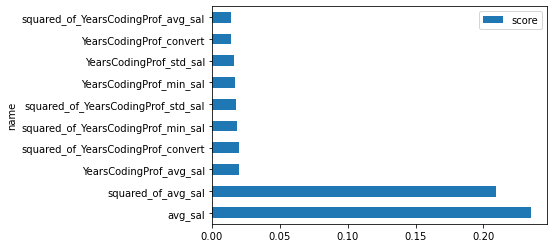

In [153]:
df_ft_score.head(10).plot.barh(x='name', y='score')

In [125]:
X_train = X_train.drop(score_0['name'], axis = 1)
X_train

,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,...,"squared_of_EducationParents_Master’s degree (MA, MS, M.Eng., MBA, etc.)","squared_of_EducationParents_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",squared_of_EducationParents_Some college/university study without earning a degree,squared_of_Age_18 - 24 years old,squared_of_Age_25 - 34 years old,squared_of_SurveyTooLong_The survey was an appropriate length,squared_of_SurveyTooLong_The survey was too long,squared_of_SurveyEasy_Neither easy nor difficult,squared_of_SurveyEasy_Somewhat easy,squared_of_SurveyEasy_Very easy
28938,1.0,5.0,9.0,4.0,2.0,10.0,7.0,3.0,8.0,6.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2074,6.0,9.0,3.0,1.0,7.0,5.0,8.0,4.0,10.0,2.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
31762,10.0,9.0,4.0,5.0,2.0,3.0,1.0,6.0,8.0,7.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
20640,3.0,4.0,7.0,1.0,2.0,5.0,8.0,6.0,10.0,9.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
20758,6.0,10.0,5.0,1.0,8.0,4.0,2.0,3.0,7.0,9.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6860,1.0,8.0,7.0,2.0,9.0,4.0,5.0,3.0,10.0,6.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
8814,10.0,9.0,4.0,1.0,6.0,5.0,2.0,3.0,8.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
21433,5.0,9.0,7.0,4.0,2.0,6.0,1.0,3.0,10.0,8.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
25370,4.0,7.0,8.0,5.0,1.0,10.0,3.0,2.0,9.0,6.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [126]:
X_test = X_test.drop(score_0['name'], axis =1)

In [165]:
from sklearn.linear_model import LinearRegression
lnr = LinearRegression()
lnr.fit(X_train, y_train)
lnr_ypred = lnr.predict(X_test)
print('LNR r2 score', r2_score(lnr_ypred, y_test))

LNR r2 score 0.6663752703514587


In [113]:
#Điểu chỉnh 1
rfr1 = RandomForestRegressor(n_estimators = 300)
rfr1.fit(X_train, y_train)
rfr1_ypred = rfr1.predict(X_test)
print('RFR r2_score: ', r2_score(rfr1_ypred, y_test))


RFR r2_score:  0.6496704950643484


In [114]:
# Điều chỉnh 2
rfr2 = RandomForestRegressor(n_estimators = 300, max_depth = 12)
rfr2.fit(X_train, y_train)
rfr2_ypred = rfr2.predict(X_test)
print('RFR r2_score: ', r2_score(rfr2_ypred, y_test))


RFR r2_score:  0.6381729101445539


In [115]:
# Điều chỉnh 3
rfr3 = RandomForestRegressor(n_estimators = 1000, max_depth = 4)
rfr3.fit(X_train, y_train)
rfr3_ypred = rfr3.predict(X_test)
print('RFR r2_score: ', r2_score(rfr3_ypred, y_test))


RFR r2_score:  0.6468644406518007


In [124]:
rfr3_ypred = rfr3.predict(X_test)
print('RFR r2_score: ', r2_score(rfr3_ypred, y_test))

RFR r2_score:  0.44799059667495156


In [121]:
gbrt = GradientBoostingRegressor(n_estimators = 500)
gbrt.fit(X_train, y_train)
errors = [mean_squared_error(y_test, gbrt_ypred)
         for gbrt_ypred in gbrt.staged_predict(X_test)]
best_n = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(n_estimators = best_n)
gbrt_best.fit(X_train, y_train)
gbrtb_ypred = gbrt_best.predict(X_test)
print('GBRT r2_score: ', r2_score(gbrtb_ypred, y_test))

GBRT r2_score:  0.7131712192019257


In [122]:
best_n

486

Khi bỏ X = 0

In [160]:
gbrt = GradientBoostingRegressor(n_estimators = 500)
gbrt.fit(X_train, y_train)
errors = [mean_squared_error(y_test, gbrt_ypred)
         for gbrt_ypred in gbrt.staged_predict(X_test)]
best_n = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(n_estimators = best_n)
gbrt_best.fit(X_train, y_train)
gbrtb_ypred = gbrt_best.predict(X_test)
print('GBRT r2_score: ', r2_score(gbrtb_ypred, y_test))

GBRT r2_score:  0.7200167568939513


In [161]:
print('GBRT MSE: ', mean_squared_error(gbrtb_ypred, y_test))
print('GBRT RMSE: ', np.sqrt(mean_squared_error(gbrtb_ypred, y_test)))

GBRT MSE:  363588017.1218705
GBRT RMSE:  19067.98408646993


Khi X > 0.0001

In [172]:
gbrt = GradientBoostingRegressor(n_estimators = 500)
gbrt.fit(X_train, y_train)
errors = [mean_squared_error(y_test, gbrt_ypred)
         for gbrt_ypred in gbrt.staged_predict(X_test)]
best_n = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(n_estimators = best_n)
gbrt_best.fit(X_train, y_train)
gbrtb_ypred = gbrt_best.predict(X_test)
print('GBRT r2_score: ', r2_score(gbrtb_ypred, y_test))

GBRT r2_score:  0.7183160237676817


In [173]:
print('GBRT MSE: ', mean_squared_error(gbrtb_ypred, y_test))
print('GBRT RMSE: ', np.sqrt(mean_squared_error(gbrtb_ypred, y_test)))

GBRT MSE:  360881917.71243155
GBRT RMSE:  18996.892317229984


In [125]:
dict_model = [('gbrt_best', gbrt_best), ('rfr',rfr1)]
soft_vote = VotingRegressor(estimators = dict_model)

soft_vote.fit(X_train, y_train)
soft_ypred = soft_vote.predict(X_test)
print('Soft Voting r2_score: ', r2_score(soft_ypred, y_test))
result_df['r2_score']['SOFT_VOTE'] = r2_score(soft_ypred, y_test)

Soft Voting r2_score:  0.6924620028499587


In [126]:
result_df['mse']['MLP'] = mean_squared_error(mlp1_ypred, y_test)
result_df['mse']['RFR'] = mean_squared_error(rfr1_ypred, y_test)
result_df['mse']['GBRT'] = mean_squared_error(gbrtb_ypred, y_test)
result_df['mse']['SOFT_VOTE'] = mean_squared_error(soft_ypred, y_test)
result_df['r2_score']['GBRT'] = r2_score(gbrtb_ypred, y_test)
result_df['r2_score']['RFR']=r2_score(rfr1_ypred, y_test)
result_df['r2_score']['MLP'] = r2_score(mlp1_ypred, y_test)

In [127]:
df_result = pd.DataFrame(result_df)
df_result

,r2_score,mse
MLP,-3.204503,4.444383e+17
RFR,0.649670,4.826684e+08
GBRT,0.713171,4.284286e+08
SOFT_VOTE,0.692462,4.355013e+08


### Chọn model phù hợp để dự đoán kết quả

Trong 4 model thì có model Gradient Boosting Regressor là tốt nhất khi mà R2 score không âm và MSE là thấp nhất

In [129]:
preds = gbrt_best.predict(test_dataset)

In [174]:
test_dataset.shape

(11259, 4106)

# 3. PREDICTING

In [130]:
def to_submit_file(file_name, values):
    submit = test_id.copy()
    submit['Salary'] = values
    submit.loc[submit['Salary'] < 0] = 0
    submit.to_csv(os.path.join(path,file_name), index = False)
    print ('Done writting submit file: ', file_name)

In [131]:
test_id = pd.read_csv(os.path.join(path,'submit.csv'))

In [132]:
y_pred = preds

In [133]:
to_submit_file('submitfile.csv',y_pred)

Done writting submit file:  submitfile.csv
